In [6]:
! unzip /content/temperature.zip

Archive:  /content/temperature.zip
   creating: temperature/
   creating: temperature/cloudy/
  inflating: temperature/cloudy/th.jpg  
  inflating: temperature/cloudy/th10.jpg  
  inflating: temperature/cloudy/th100.jpg  
  inflating: temperature/cloudy/th101.jpg  
  inflating: temperature/cloudy/th102.jpg  
  inflating: temperature/cloudy/th103.jpg  
  inflating: temperature/cloudy/th104.jpg  
  inflating: temperature/cloudy/th105.jpg  
  inflating: temperature/cloudy/th106.jpg  
  inflating: temperature/cloudy/th107.jpg  
  inflating: temperature/cloudy/th108.jpg  
  inflating: temperature/cloudy/th109.jpg  
  inflating: temperature/cloudy/th11.jpg  
  inflating: temperature/cloudy/th110.jpg  
  inflating: temperature/cloudy/th111.jpg  
  inflating: temperature/cloudy/th112.jpg  
  inflating: temperature/cloudy/th113.jpg  
  inflating: temperature/cloudy/th114.jpg  
  inflating: temperature/cloudy/th115.jpg  
  inflating: temperature/cloudy/th116.jpg  
  inflating: temperature/cloudy

In [7]:
! unzip /content/climate.zip

Archive:  /content/climate.zip
   creating: climate/
   creating: climate/foggy/
  inflating: climate/foggy/th.jpg    
  inflating: climate/foggy/th10.jpg  
  inflating: climate/foggy/th100.jpg  
  inflating: climate/foggy/th101.jpg  
  inflating: climate/foggy/th102.jpg  
  inflating: climate/foggy/th103.jpg  
  inflating: climate/foggy/th104.jpg  
  inflating: climate/foggy/th105.jpg  
  inflating: climate/foggy/th106.jpg  
  inflating: climate/foggy/th107.jpg  
  inflating: climate/foggy/th108.jpg  
  inflating: climate/foggy/th109.jpg  
  inflating: climate/foggy/th11.jpg  
  inflating: climate/foggy/th110.jpg  
  inflating: climate/foggy/th111.jpg  
  inflating: climate/foggy/th112.jpg  
  inflating: climate/foggy/th113.jpg  
  inflating: climate/foggy/th114.jpg  
  inflating: climate/foggy/th115.jpg  
  inflating: climate/foggy/th116.jpg  
  inflating: climate/foggy/th117.jpg  
  inflating: climate/foggy/th118.jpg  
  inflating: climate/foggy/th119.jpg  
  inflating: climate/fogg

In [8]:
pip install tensorflow matplotlib

In [10]:
! unzip /content/weather.zip

Archive:  /content/weather.zip
   creating: weather/
   creating: weather/cloudy/
  inflating: weather/cloudy/phoenix1x-1635969740513.min.png  
  inflating: weather/cloudy/th.jpg   
  inflating: weather/cloudy/th10.jpg  
  inflating: weather/cloudy/th100.jpg  
  inflating: weather/cloudy/th101.jpg  
  inflating: weather/cloudy/th102.jpg  
  inflating: weather/cloudy/th103.jpg  
  inflating: weather/cloudy/th104.jpg  
  inflating: weather/cloudy/th105.jpg  
  inflating: weather/cloudy/th106.jpg  
  inflating: weather/cloudy/th107.jpg  
  inflating: weather/cloudy/th108.jpg  
  inflating: weather/cloudy/th109.jpg  
  inflating: weather/cloudy/th11.jpg  
  inflating: weather/cloudy/th110.jpg  
  inflating: weather/cloudy/th111.jpg  
  inflating: weather/cloudy/th112.jpg  
  inflating: weather/cloudy/th113.jpg  
  inflating: weather/cloudy/th114.jpg  
  inflating: weather/cloudy/th115.jpg  
  inflating: weather/cloudy/th116.jpg  
  inflating: weather/cloudy/th117.jpg  
  inflating: weather

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Horizontal flips
    fill_mode='nearest'  # Fill missing pixels
)


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Horizontal flips
    fill_mode='nearest'  # Fill missing pixels
)


In [139]:
# Define train and validation directories
test_dir = ('/content/weather')
train_dir = ('/content/temperature')


In [162]:

# Flow images from directory for training

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'      # Use 'categorical' if there are more than 2 classes
)

Found 561 images belonging to 2 classes.


In [163]:
# Create the testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1512 images belonging to 5 classes.


In [164]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (use softmax for multi-class)
])

In [165]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

In [166]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,  # Number of batches per epoch (usually # images / batch_size)
    epochs=10,
    validation_data=test_generator,
    validation_steps=32  # Number of batches for validation
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5574 - loss: 1.5108 - val_accuracy: 0.2129 - val_loss: 1.2888
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6971 - loss: 0.6352 - val_accuracy: 0.2213 - val_loss: 1.2692
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7012 - loss: 0.5960 - val_accuracy: 0.2109 - val_loss: 3.1836
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6478 - loss: 0.7198 - val_accuracy: 0.1762 - val_loss: -0.0911
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6843 - loss: 0.6439 - val_accuracy: 0.2002 - val_loss: 1.3326
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7239 - loss: 0.5221 - val_accuracy: 0.1680 - val_loss: -0.5446
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7209 - loss: 0.5346 - val_accuracy: 0.1680 - val_loss: 0.3966
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7396 - loss: 0.5235 - val_accuracy: 0.2090 - val_los

In [169]:
test_loss, test_acc = model.evaluate(train_generator, steps=32)
print(f"Test accuracy: {test_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 358ms/step - accuracy: 0.7307 - loss: 0.5219
Test accuracy: 0.7415329813957214


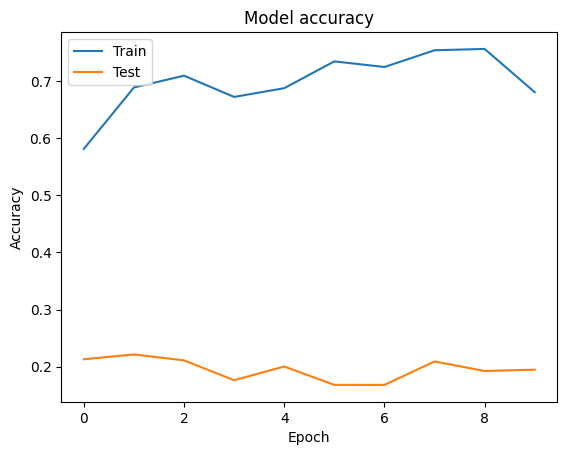

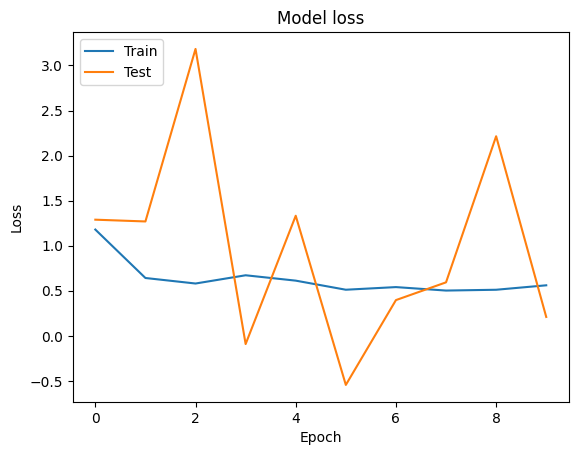

In [170]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()